## facematch

Aqui, espero conseguir mesmo que de maneira rudimentar encontrar os vetores que represetam os dois rostos. Para isso, pretendo utilizar o 'pacote' https://github.com/DefTruth/torchlm.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import deepface
import sys
sys.path.append('../')
from facematch import Facematch
%load_ext autotime

time: 115 µs (started: 2024-02-29 12:53:17 -03:00)


In [2]:
df = pd.read_parquet('../base/filtered_scored_data.parquet')


time: 47.9 ms (started: 2024-02-28 11:44:54 -03:00)


In [4]:
len(df[df['approved'] == True])

4533

time: 8.37 ms (started: 2024-02-28 11:45:10 -03:00)


In [20]:
#laod df with 50% of approved True and 50% of approved False
df2use = df[df['approved'] == False].sample(100)
df2use = pd.concat((df2use,df[df['approved'] == True].sample(100)))

print(len(df2use))
respostas_reais = []

registration_images = df2use.registration_image.values
comparision_image = df2use.comparision_image.values
similarity = df2use.similarity.values
unico_status = df2use.approved.values

for i in range(len(respostas_reais), len(df2use)):
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].imshow(cv2.imread('../base/imagens/' + registration_images[i])[:,:,::-1])
    ax[1].imshow(cv2.imread('../base/imagens/' + comparision_image[i])[:,:,::-1])
    plt.savefig('images_2_check/imagem.png')
    plt.close()
    
    resposta = 'XXX'
        
    while not(resposta.lower() in 'sn'):
        resposta = input('Aprovado? (s/n)')

    respostas_reais.append(resposta.lower() == 's')

    #save respostas_reais as txt
    with open('respostas_reais.txt', 'w') as f:
        f.write(str(respostas_reais))

    del fig, ax

#plot confusion matrix
df2use['respostas_reais'] = respostas_reais


from sklearn.metrics import classification_report

NameError: name 'df' is not defined

time: 256 ms (started: 2024-02-29 13:05:21 -03:00)


index
3876     False
16580    False
8976     False
365      False
19244    False
         ...  
18097     True
17886     True
6378      True
14295     True
13982     True
Name: approved, Length: 200, dtype: bool

time: 4.02 ms (started: 2024-02-29 13:05:35 -03:00)


In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix((df2use['respostas_reais'].values,df2use['approved'].values)))
print(confusion_matrix(df2use['respostas_reais'].values, (df2use['approved'].values) | (df2use['similarity'].values > 0.6)))
print(confusion_matrix((df2use['similarity'].values > 0.7), df2use['respostas_reais'].values))

#print classification report
print(classification_report((df2use['respostas_reais'].values, df2use['approved'].values),))
print(classification_report(df2use['respostas_reais'].values, (df2use['approved'].values) | (df2use['similarity'].values > 0.6)))
print(classification_report(df2use['respostas_reais'].values,(df2use['approved'].values) | (df2use['similarity'].values > 0.8)))

[[90 10]
 [ 5 95]]
[[ 89   4]
 [  6 101]]
[[94 44]
 [ 1 61]]
              precision    recall  f1-score   support

       False       0.95      0.90      0.92       100
        True       0.90      0.95      0.93       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200

              precision    recall  f1-score   support

       False       0.94      0.96      0.95        93
        True       0.96      0.94      0.95       107

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

              precision    recall  f1-score   support

       False       0.91      0.95      0.93        95
        True       0.95      0.91      0.93       105

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg 

In [8]:
#save as parquet
df2use = pd.read_parquet('df2use_see_images.parquet')

time: 13.7 ms (started: 2024-02-29 12:55:33 -03:00)


0.9374436090225566

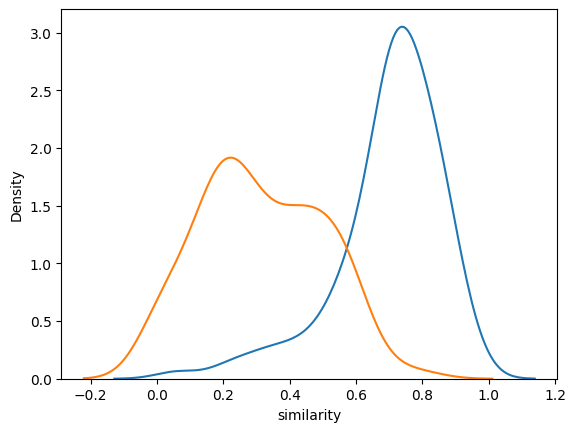

time: 342 ms (started: 2024-02-28 12:02:44 -03:00)


In [12]:
#plot KS of similarity respostas_reais
sns.kdeplot(df2use[df2use['respostas_reais'] == True].similarity, label='True')
sns.kdeplot(df2use[df2use['respostas_reais'] == False].similarity, label='False')

#plot AuC of similarity respostas_reais
from sklearn.metrics import roc_auc_score
roc_auc_score(df2use['respostas_reais'], df2use['similarity'])


time: 1.23 ms (started: 2024-02-20 13:54:47 -03:00)


time: 41.7 ms (started: 2024-02-20 13:54:59 -03:00)


time: 14.3 ms (started: 2024-02-29 12:53:18 -03:00)


In [51]:
similarity_boolean = similarity > 0.6

#print coffunsuion matrix
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(real, similarity_boolean))
print(classification_report(real, similarity_boolean))

print(confusion_matrix(real, unico_status))
print(classification_report(real, unico_status))

[[44  1]
 [15 40]]
              precision    recall  f1-score   support

       False       0.75      0.98      0.85        45
        True       0.98      0.73      0.83        55

    accuracy                           0.84       100
   macro avg       0.86      0.85      0.84       100
weighted avg       0.87      0.84      0.84       100

[[39  6]
 [ 3 52]]
              precision    recall  f1-score   support

       False       0.93      0.87      0.90        45
        True       0.90      0.95      0.92        55

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100

time: 16.4 ms (started: 2024-02-06 13:37:10 -03:00)


In [ ]:
#print coffunsuion matrix
